# Báo cáo Khai phá Dữ liệu - Trực quan hóa (EDA)

Mục tiêu: Tạo tất cả các biểu đồ cần thiết cho Chương 5: Trực quan hóa Dữ liệu.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập style chung cho các biểu đồ
sns.set_theme(style="whitegrid")
print("Libraries imported!")

Libraries imported!


In [2]:
# Tải dữ liệu
try:
    data = pd.read_csv('heart.csv')
except FileNotFoundError:
    print("Không tìm thấy file heart.csv")

# Xử lý trùng lặp (giống các notebook ML)
data = data.drop_duplicates()
print(f"Dữ liệu đã tải: {data.shape[0]} hàng và {data.shape[1]} cột.")
print(data.head())

Dữ liệu đã tải: 918 hàng và 12 cột.
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


## 1. Mục 5.1: Trực quan hóa Phân phối

C:\Users\LEGION\AppData\Local\Temp\ipykernel_13784\3929830000.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data=data, palette='pastel')


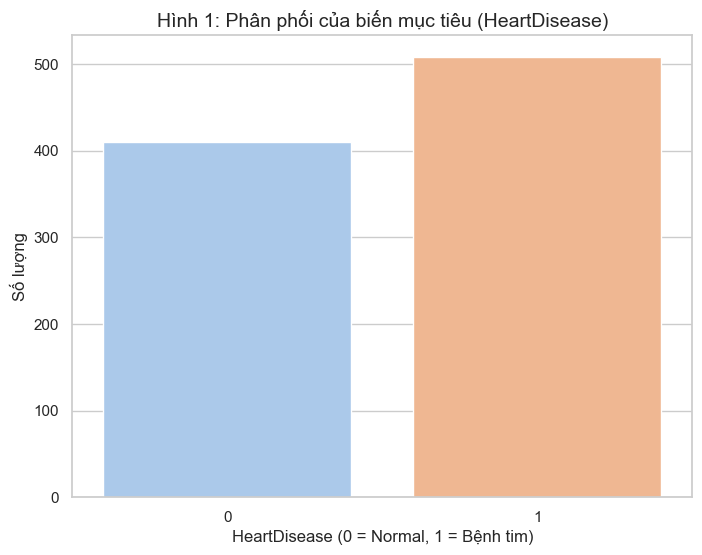

In [3]:
# Hình 1: Phân phối của biến mục tiêu (HeartDisease)
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDisease', data=data, palette='pastel')
plt.title('Hình 1: Phân phối của biến mục tiêu (HeartDisease)', fontsize=14)
plt.xlabel('HeartDisease (0 = Normal, 1 = Bệnh tim)')
plt.ylabel('Số lượng')

# Lưu hình ảnh
plt.savefig('hinh-phanphoi-mucchieu.png', dpi=300, bbox_inches='tight')
plt.show()

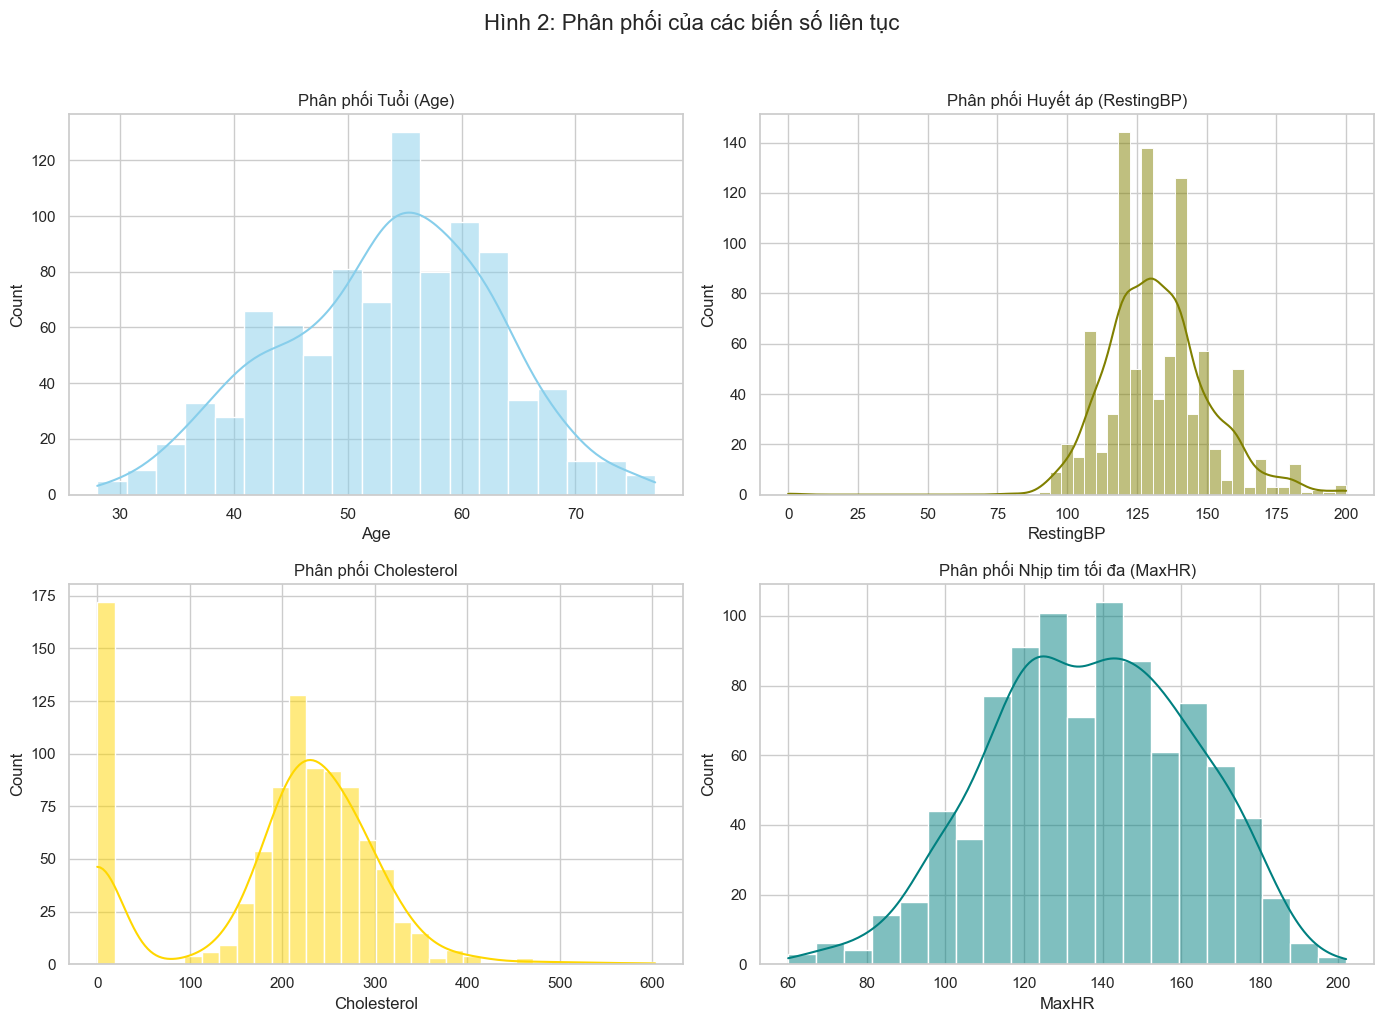

In [4]:
# Hình 2: Phân phối các biến số liên tục
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Hình 2: Phân phối của các biến số liên tục', fontsize=16, y=1.02)

sns.histplot(data[numerical_cols[0]], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Phân phối Tuổi (Age)')

sns.histplot(data[numerical_cols[1]], kde=True, ax=axes[0, 1], color='olive')
axes[0, 1].set_title('Phân phối Huyết áp (RestingBP)')

sns.histplot(data[numerical_cols[2]], kde=True, ax=axes[1, 0], color='gold')
axes[1, 0].set_title('Phân phối Cholesterol')

sns.histplot(data[numerical_cols[3]], kde=True, ax=axes[1, 1], color='teal')
axes[1, 1].set_title('Phân phối Nhịp tim tối đa (MaxHR)')

plt.tight_layout()

# Lưu hình ảnh
plt.savefig('hinh-phanphoi-so.png', dpi=300, bbox_inches='tight')
plt.show()

## 2. Mục 5.2: Trực quan hóa Mối quan hệ

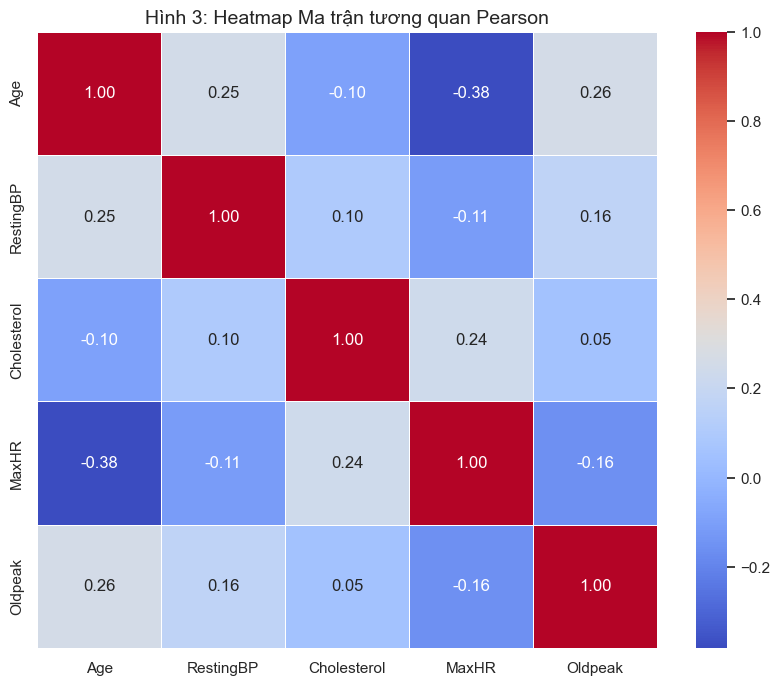

In [5]:
# Hình 3: Ma trận tương quan (Heatmap)

# Chỉ chọn các cột số gốc để tính tương quan
numeric_features_corr = data[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]
corr_matrix = numeric_features_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Hình 3: Heatmap Ma trận tương quan Pearson', fontsize=14)

# Lưu hình ảnh
plt.savefig('hinh-heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

## 3. Mục 5.4: Trực quan hóa So sánh nhóm

C:\Users\LEGION\AppData\Local\Temp\ipykernel_13784\3031630651.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y='Age', data=data, ax=axes[0, 0], palette='pastel')
C:\Users\LEGION\AppData\Local\Temp\ipykernel_13784\3031630651.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y='RestingBP', data=data, ax=axes[0, 1], palette='pastel')
C:\Users\LEGION\AppData\Local\Temp\ipykernel_13784\3031630651.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y='Cholesterol', data=data, ax=axes[1,

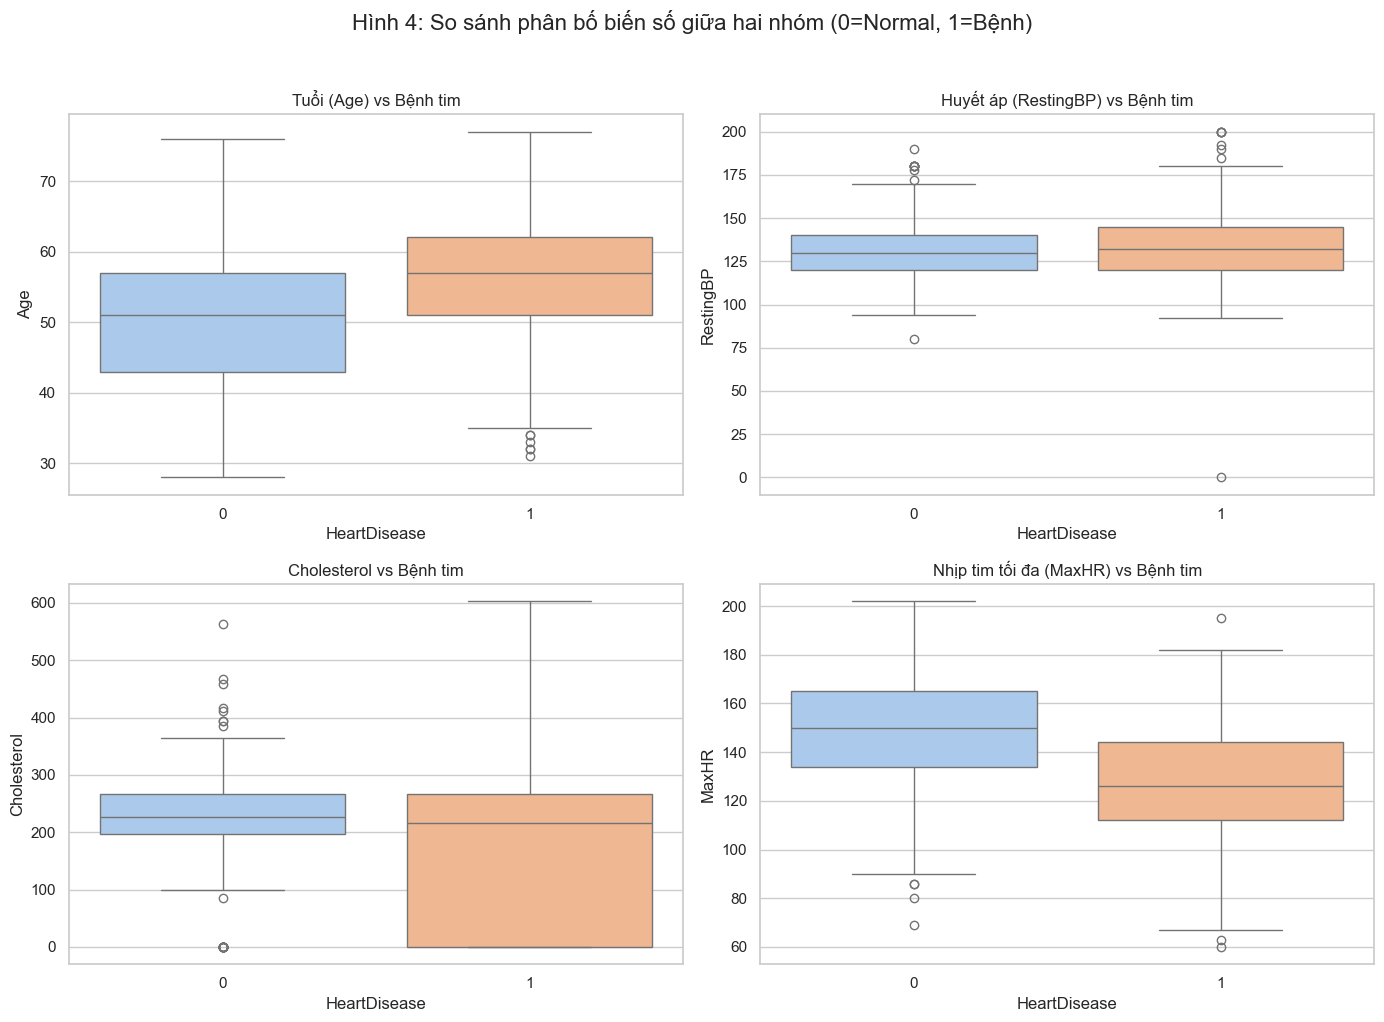

In [6]:
# Hình 4: So sánh phân bố (Boxplot) theo nhóm
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Hình 4: So sánh phân bố biến số giữa hai nhóm (0=Normal, 1=Bệnh)', fontsize=16, y=1.02)

sns.boxplot(x='HeartDisease', y='Age', data=data, ax=axes[0, 0], palette='pastel')
axes[0, 0].set_title('Tuổi (Age) vs Bệnh tim')

sns.boxplot(x='HeartDisease', y='RestingBP', data=data, ax=axes[0, 1], palette='pastel')
axes[0, 1].set_title('Huyết áp (RestingBP) vs Bệnh tim')

sns.boxplot(x='HeartDisease', y='Cholesterol', data=data, ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title('Cholesterol vs Bệnh tim')

sns.boxplot(x='HeartDisease', y='MaxHR', data=data, ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title('Nhịp tim tối đa (MaxHR) vs Bệnh tim')

plt.tight_layout()

# Lưu hình ảnh
plt.savefig('hinh-boxplot-nhom.png', dpi=300, bbox_inches='tight')
plt.show()

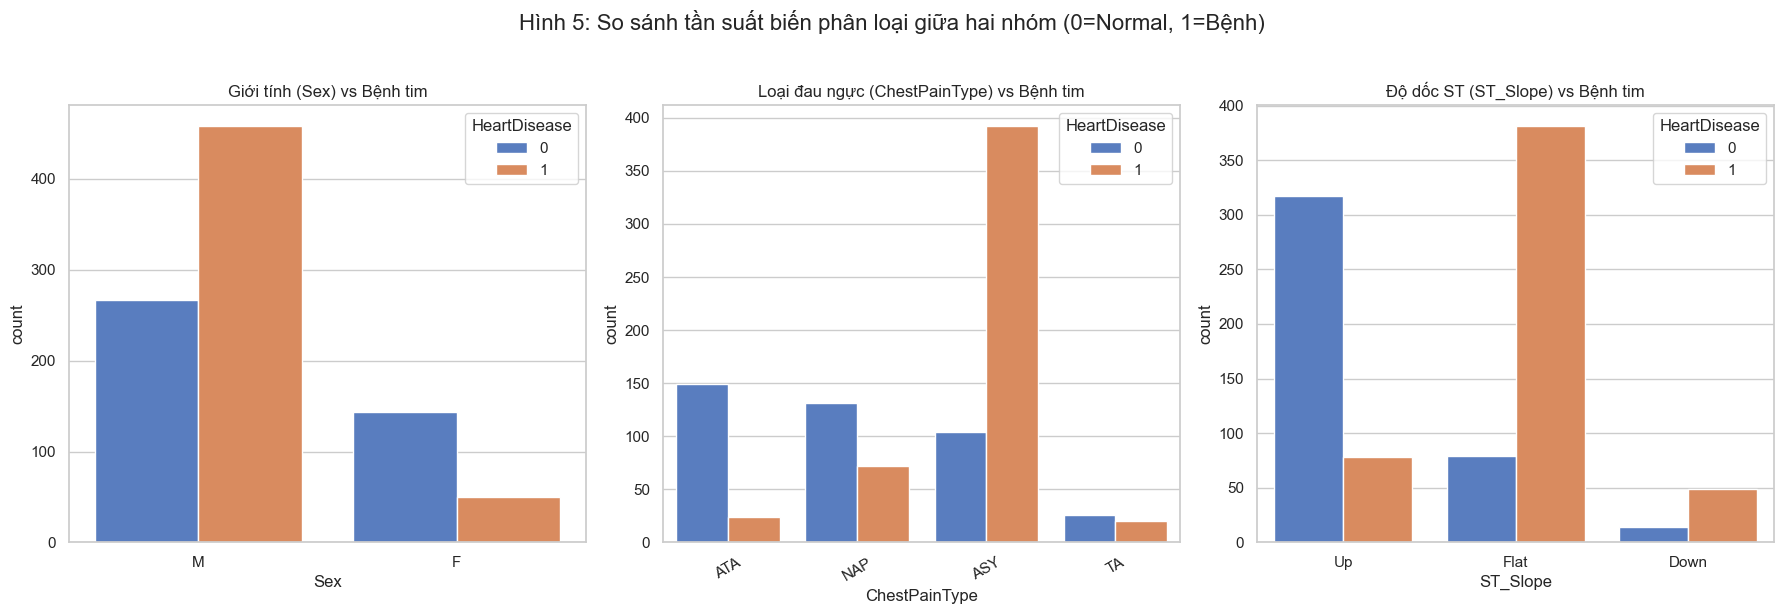

In [7]:
# Hình 5: So sánh tần suất (Countplot) theo nhóm
categorical_cols = ['Sex', 'ChestPainType', 'ST_Slope']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Hình 5: So sánh tần suất biến phân loại giữa hai nhóm (0=Normal, 1=Bệnh)', fontsize=16, y=1.02)

sns.countplot(x=categorical_cols[0], hue='HeartDisease', data=data, ax=axes[0], palette='muted')
axes[0].set_title('Giới tính (Sex) vs Bệnh tim')

sns.countplot(x=categorical_cols[1], hue='HeartDisease', data=data, ax=axes[1], palette='muted')
axes[1].set_title('Loại đau ngực (ChestPainType) vs Bệnh tim')
axes[1].tick_params(axis='x', rotation=30)

sns.countplot(x=categorical_cols[2], hue='HeartDisease', data=data, ax=axes[2], palette='muted')
axes[2].set_title('Độ dốc ST (ST_Slope) vs Bệnh tim')

plt.tight_layout()

# Lưu hình ảnh
plt.savefig('hinh-countplot-nhom.png', dpi=300, bbox_inches='tight')
plt.show()